## Problem Statement:
The dataset provided contains information about customers of a telecommunications company(Syria TelCommunications), including their usage patterns, demographics, and services they subscribe to. The objective of the project is to analyze this dataset to understand customer churn. Churn refers to the rate at which customers leave the service, and it is a critical metric for businesses as it directly impacts revenue growth and customer retention strategies. By performing exploratory data analysis (EDA) and identifying patterns in customer behavior, I aim to develop a deeper understanding of the factors contributing to churn. This analysis will provide insights into which customer segments are most likely to leave the service and help the company devise strategies to improve customer retention.


## Objectives

#### *Main Objective*
1. Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel .

#### *Key Objectives*
2. Investigate customer segmentation based on demographics and usage patterns to identify factors most associated with churn.

3. Visualize the impact of customer usage patterns (e.g., call minutes, customer service calls) on churn rates through relevant plots.

4. Provide actionable insights for improving customer retention by analyzing churn trends across service plans and customer segments.


## **1.Data Understanding**

Here’s an overview of the libraries imported when working on data analysis, preprocessing, and ML. 

In [5]:
# importing libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve, auc
)
import warnings
warnings.filterwarnings("ignore")

In [6]:
class DataUnderstanding:
    def __init__(self, df):
        self.df = df 

    def basic_info(self):
        print("\nBasic Information:")
        print(self.df.info())

    def basic_shape(self):
        print("\nBasic Shape:")
        print(self.df.shape)
        
    def missing_values(self):
        print("\nMissing Values:")
        print(self.df.isnull().sum())

    def statistical_summary(self):
        print("\nStatistical Summary:")
        print(self.df.describe())
        

    def all_columns_value_counts(self):
        print("\nValue Counts for All Columns:")
        for col in self.df.columns:
            print(f"\nColumn: {col}")
            print(self.df[col].value_counts())


##### *Loading the dataset*

In [8]:
print(os.listdir(r"C:\Users\admin\Downloads\churn_dataset"))

['bigml_59c28831336c6604c800002a.csv']


In [9]:
df = pd.read_csv(r"C:\Users\admin\Downloads\churn_dataset\bigml_59c28831336c6604c800002a.csv", encoding='latin1')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### *Calling the methods*

In [11]:
# Creating an instance for data_understanding
data_understanding = DataUnderstanding(df)

In [12]:
# Check basic information about the dataset
data_understanding.basic_info()


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls   

In [13]:
# Checking the shape of the dataset
data_understanding.basic_shape()


Basic Shape:
(3333, 21)


The dataset contains 3333 entries, each with 21 columns

In [15]:
# Identify any missing values in the dataset
data_understanding.missing_values()


Missing Values:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [16]:
# Get statistical summaries of numerical columns
data_understanding.statistical_summary()


Statistical Summary:
       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.0

In [17]:
# Checking the value counts for each column to understand the distribuution of values
data_understanding.all_columns_value_counts()


Value Counts for All Columns:

Column: state
state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

Column: account length
account length
105    43
87     42
101    40
93     40
90     39
       ..
243     1
200     1
232     1
5       1
221     1
Name: count, Length: 212, dtype: int64

Column: area code
area code
415    1655
510     840
408     838
Name: count, dtype: int64

Column: phone number
phone number
382-4657    1
348-7071    1
389-6082    1
415-3689    1
379-2503    1
           ..
352-1127    1


## **2.Data Preparation**

In the data preparation stage, several key tasks are performed to ensure the dataset is clean and ready for analysis:
- handling duplicated
- merging features
- dropping irrelevant columns

In [20]:
class DataPreparation:
    def __init__(self, df):
        self.df = df

    def handle_duplicates(self):
        duplicates = self.df.duplicated().sum()
        if duplicates > 0:
            self.df.drop_duplicates(inplace=True)
            print(f"Removed {duplicates} duplicate rows.")
        else:
            print("No duplicate rows found.")

    def create_combined_columns(self):
        self.df['total_combined_calls'] = (
            self.df['total day calls'] + self.df['total eve calls'] +
            self.df['total night calls'] + self.df['total intl calls']
        )
        self.df['total_combined_minutes'] = (
            self.df['total day minutes'] + self.df['total eve minutes'] +
            self.df['total night minutes'] + self.df['total intl minutes']
        )
        self.df['total_combined_charges'] = (
            self.df['total day charge'] + self.df['total eve charge'] +
            self.df['total night charge'] + self.df['total intl charge']
        )
        print("Combined columns created.")

    def drop_unused_columns(self):
        columns_to_drop = [
            'total day calls', 'total eve calls', 'total night calls', 'total intl calls',
            'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes',
            'total day charge', 'total eve charge', 'total night charge', 'total intl charge',
            'account length', 'state'
        ]
        self.df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
        print("Dropped unused columns.")

    def run_preparation(self):
        self.handle_duplicates()  
        self.create_combined_columns()
        self.drop_unused_columns()

    def get_prepared_data(self):
        return self.df


In [21]:
 prep = DataPreparation(df)

In [22]:
# Run all preparation steps
prep.run_preparation()

No duplicate rows found.
Combined columns created.
Dropped unused columns.


In [23]:
# Get the prepared DataFrame
prepared_df = prep.get_prepared_data()
print(prepared_df.head())

   area code phone number international plan voice mail plan  \
0        415     382-4657                 no             yes   
1        415     371-7191                 no             yes   
2        415     358-1921                 no              no   
3        408     375-9999                yes              no   
4        415     330-6626                yes              no   

   number vmail messages  customer service calls  churn  total_combined_calls  \
0                     25                       1  False                   303   
1                     26                       1  False                   332   
2                      0                       0  False                   333   
3                      0                       2  False                   255   
4                      0                       3  False                   359   

   total_combined_minutes  total_combined_charges  
0                   717.2                   75.56  
1                   625.

In [24]:
prepared_df.dtypes

area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
customer service calls      int64
churn                        bool
total_combined_calls        int64
total_combined_minutes    float64
total_combined_charges    float64
dtype: object



## **3.EDA**

The goal is to understand the dataset's underlying structure and patterns.

In [27]:

class Visualizations:
    def __init__(self, prepared_df):
        self.df = prepared_df

    # Function to plot univariate visualizations
    def plot_univariate(self, objective):
        if objective == 'customer_segmentation':
            demo_cols = ['area code', 'international plan', 'voice mail plan']
            usage_cols = ['total_combined_calls', 'total_combined_minutes', 'total_combined_charges']
            

        elif objective == 'churn_prediction':
            churn_cols = ['customer service calls']
            for col in churn_cols:
                plt.figure(figsize=(8, 6))
                sns.histplot(self.df[col], bins=20, color='green')
                plt.title(f'Distribution of {col}')
                plt.xlabel(col)
                plt.ylabel('Frequency')
                plt.show()

        elif objective == 'customer_usage':
            usage_cols = ['total_combined_calls', 'number vmail messages']
            for col in usage_cols:
                plt.figure(figsize=(8, 6))
                sns.histplot(self.df[col], bins=20, color='purple')
                average=self.df[col].mean()
                plt.axvline(average, color='red', linestyle='--', label=f'Average: {average:.2f}')
                plt.title(f'Distribution of {col}')
                plt.xlabel(col)
                plt.ylabel('Frequency')
                plt.show()

    # Function to plot bivariate relationships
    def plot_bivariate(self, objective):
        if objective == 'customer_usage':
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=self.df, x='total_combined_charges', y='total_combined_calls', palette='Set2')
            plt.title('Total_combined_charges vs Total Combined Calls')
            plt.tight_layout()
            plt.show()

        elif objective == 'churn_prediction':
            plt.figure(figsize=(8, 6))
            sns.barplot(data=self.df, x='churn', y='customer service calls', palette='Set2')      
            plt.title('Churn vs Customer service call')
            plt.show()


    # Function to plot multivariate relationships
    def plot_multivariate(self, objective):

        if objective == 'churn_prediction':
            mosaic(df, ['international plan', 'voice mail plan', 'churn'])
            plt.title('Mosaic Plot of International Plan, Voice Mail Plan, and Churn')
            plt.show()


        elif objective == 'customer_usage':
            usage_cols = ['total_combined_calls', 'total_combined_minutes', 'total_combined_charges']
            sns.pairplot(self.df[usage_cols])
            plt.title('Pairplot of Usage Features')
            plt.show()




In [28]:
visualizer = Visualizations(prepared_df)

### **1.Churn Prediction**

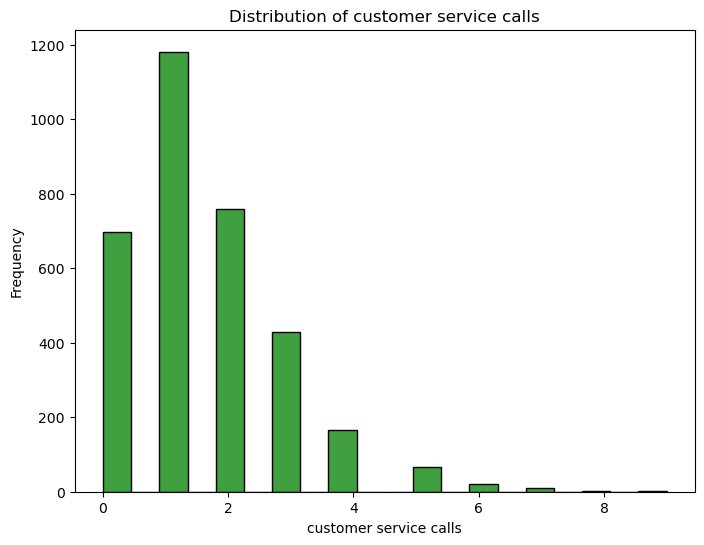

In [30]:
# Now for the 'churn_prediction' objective
visualizer.plot_univariate(objective='churn_prediction')

**Observation**

The count of customers who have called customer service are evidently overpowering those who don't and this tends to affect churn rates either positively or negatively. i.e it may be a complaint or  something positive

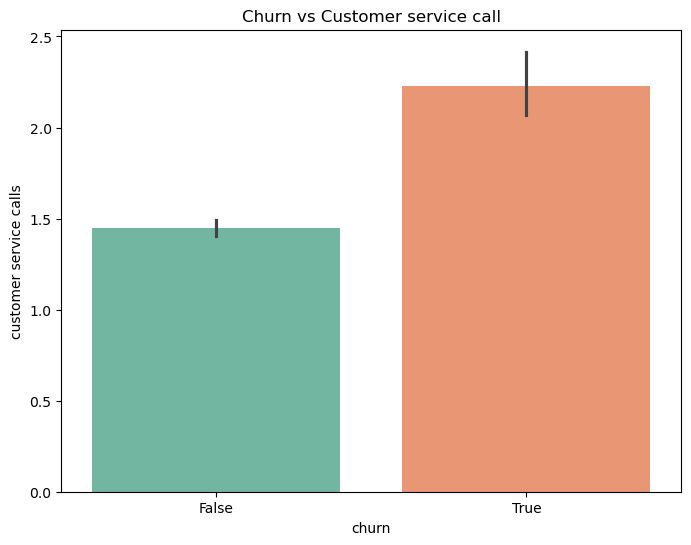

In [32]:
visualizer.plot_bivariate(objective='churn_prediction')

**Observation**

This plot clearly shows the relationship between churn and customer service calls, further supporting the arguement that the number of calls made to customer service has an impact on churn
On average, customers who have main calls to customer service 2 or more times terminated the service.

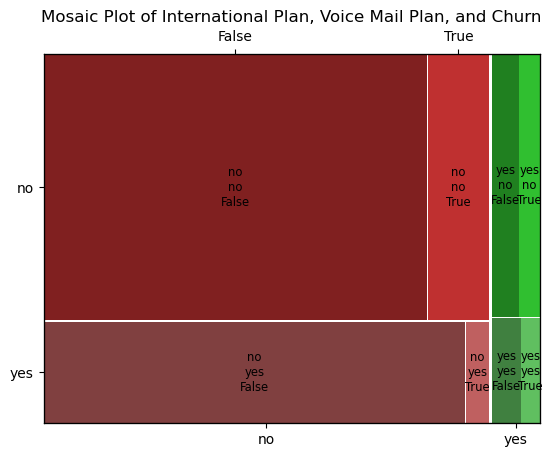

In [34]:
visualizer.plot_multivariate(objective='churn_prediction')

**Interpretation:**

- International Plan ('yes' and 'no'):

Most customers without an international plan ('no') are shown in the large red block on the left. This indicates that a substantial portion of customers who are not subscribed to the international plan tend to have low churn rates (indicated by False churn).
Customers with an international plan ('yes') make up a smaller portion of the plot, and their distribution is visible in the middle section of the plot.

- Voice Mail Plan ('yes' and 'no'):

The customers who have the voice mail plan ('yes') are shown in the bottom portion, with most of them not churning (False).
The upper portion is taken up by those who do not have a voice mail plan ('no'), where churn is also more frequent (True), suggesting a correlation between not having a voice mail plan and higher churn.

- Churn (True vs. False):

The green sections represent churn (True), and the red sections represent non-churn (False).
The True churn category (on the right) is smaller compared to the False category (on the left), suggesting that churn is relatively low among the customers.
International plan ('yes') and voice mail plan ('yes') customers are more likely to churn, though this is a small segment of the overall customer base.

Summary:
Churn is more frequent among customers who do not have an international plan or voice mail plan.
The combination of having both an international plan and a voice mail plan seems to reduce churn, as seen in the smaller portion of churn in this group.

### **2.Customer Usage**

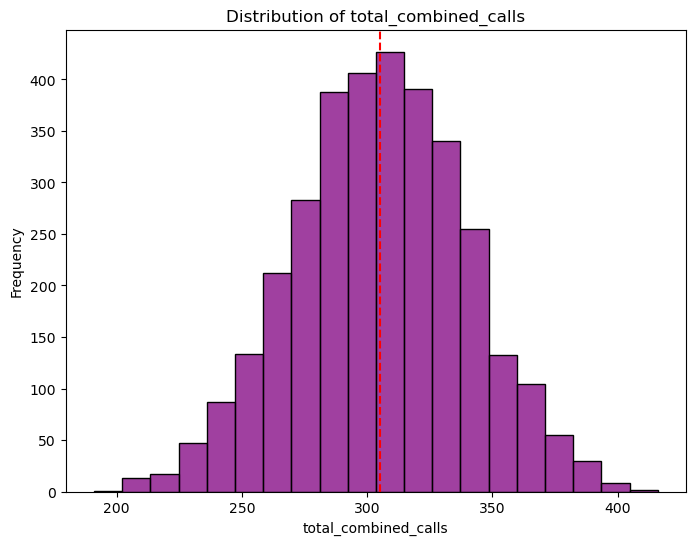

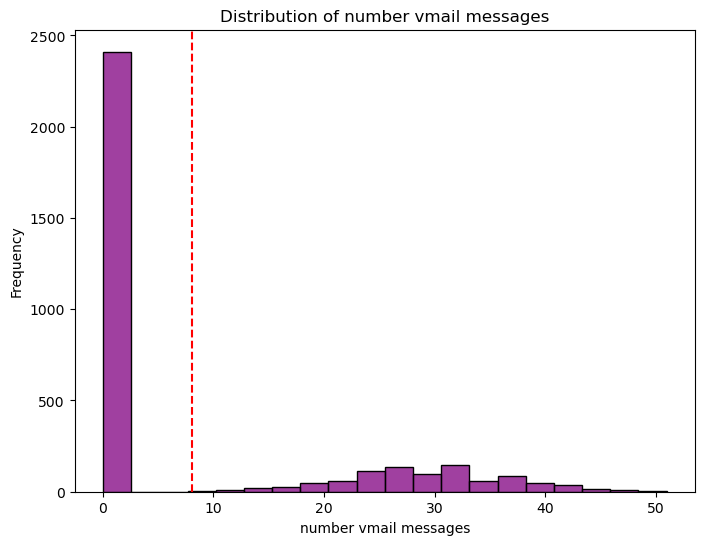

In [37]:
# And for the 'customer_usage' objective
visualizer.plot_univariate(objective='customer_usage')

**Observation**

The plot for total combined calls is normally distributed displaying little to no skew thus it may act as a suitable  predictor as compared to the number vmail messages

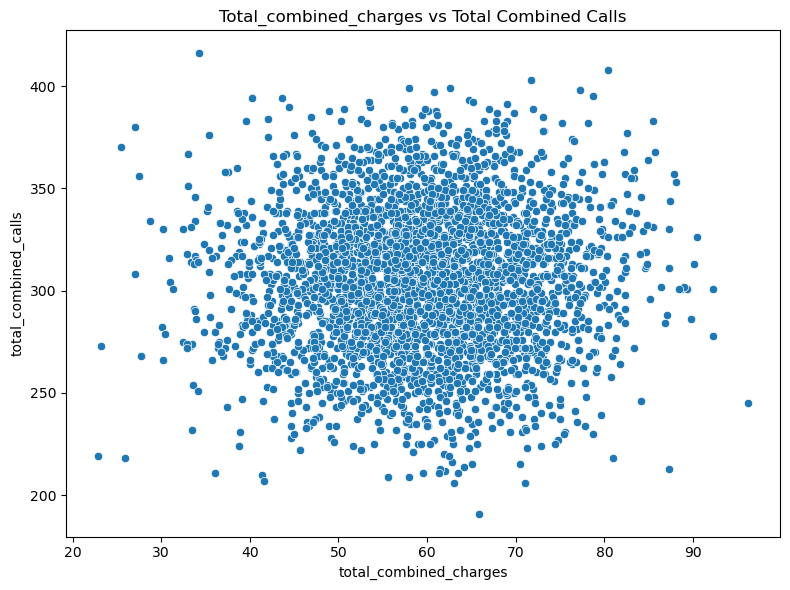

In [39]:
visualizer.plot_bivariate(objective='customer_usage')

**Observation**

1. There is little to no correlation between total combined calls and total combine charges
2. Their values are spread evenly without a trend, not potraying any kind of linear relationship

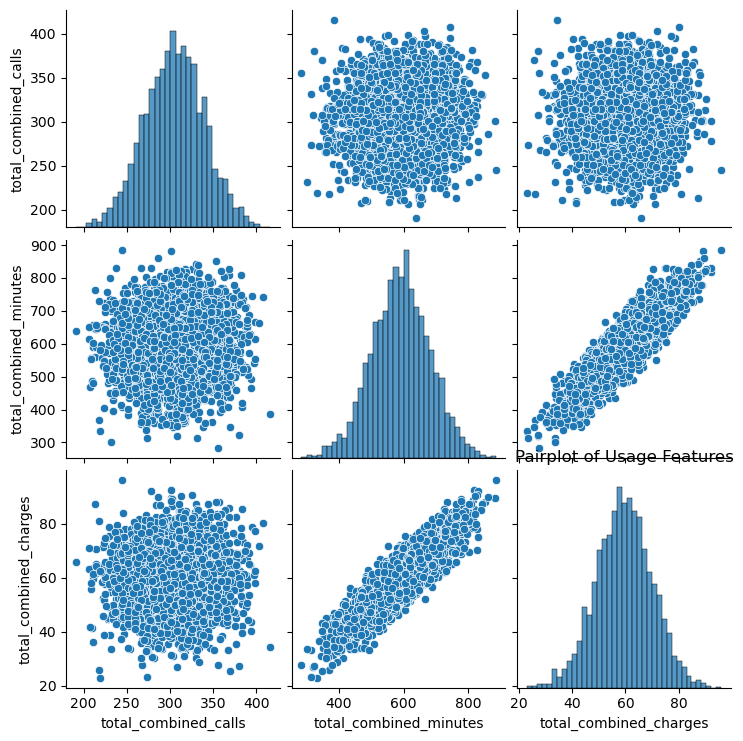

In [41]:
visualizer.plot_multivariate(objective='customer_usage')

**Observations**

- The scatter plot for minutes vs charges shows a strong positive correlation as higher minutes result to higher changes explaining linear dependencies in the data
- Calls,minutes and charges protray a roughly normal distribution and show a similiar pattern implying their values are fairly symmetrical and concentrated around the mean

## **4.Feature Engineering**

In this step, the phone number column is set as the index for the DataFrame to ensure that it is uniquely identifying each row.
   



In [45]:
prepared_df = df.set_index('phone number')
df_updated = pd.get_dummies(prepared_df,drop_first=True,  dtype=float)

df_updated.head()

,area code,number vmail messages,customer service calls,churn,total_combined_calls,total_combined_minutes,total_combined_charges,international plan_yes,voice mail plan_yes
phone number,,,,,,,,,
382-4657,415,25,1,False,303,717.2,75.56,0.0,1.0
371-7191,415,26,1,False,332,625.2,59.24,0.0,1.0
358-1921,415,0,0,False,333,539.4,62.29,0.0,0.0
375-9999,408,0,2,False,255,564.8,66.80,1.0,0.0
330-6626,415,0,3,False,359,512.0,52.09,1.0,0.0


The output shows the first few rows of the transformed dataset after setting the 'phone number' as the index and applying one-hot encoding. 

The phone number is now the index for the DataFrame, making each row uniquely identifiable by the phone number.

##### **Feature Engineering Process**

The `FeatureEngineeringUpdated` class implements various methods for feature engineering, including encoding categorical variables, scaling numerical features, and handling the target column. Here is a summary of the key methods:

1. **`encode_columns(columns)`**: 
   - Label encodes categorical columns in the list `columns`.
   - Applies `LabelEncoder` for categorical columns only.
   
2. **`encode_target(target_column='churn')`**: 
   - Label encodes the target column (default is 'churn') if it is boolean.
   
3. **`encode_area_code()`**: 
   - Converts the 'area code' column into dummy variables using `pd.get_dummies` and removes the original 'area code' column.
   
4. **`encode_area_codes()`**: 
   - Label encodes the binary area code columns (`area_code_408`, `area_code_415`, `area_code_510`).

5. **`scale_columns(columns)`**: 
   - Scales numerical columns in the list `columns` using `StandardScaler`.

6. **`run_feature_engineering(encode_columns=None, scale_columns=None, target_column='churn')`**: 
   - Runs the full feature engineering pipeline by encoding specified columns, scaling numerical features, and encoding the target column.

7. **`get_processed_data()`**: 
   - Returns the processed DataFrame after feature engineering is applied.

This class helps automate feature engineering tasks, making the dataset ready for machine learning modeling.


In [48]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

class FeatureEngineeringUpdated:
    def __init__(self, df_updated):
        self.df = df_updated
    
    def encode_columns(self, columns):
        for column in columns:
            if column in self.df.columns:
                if self.df[column].dtype == 'object':  # Check for categorical columns
                    label_encoder = LabelEncoder()
                    self.df[column] = label_encoder.fit_transform(self.df[column])
                    print(f"Encoded '{column}' using LabelEncoder.")
                else:
                    print(f"Column '{column}' is not categorical. Skipping.")
            else:
                print(f"Column '{column}' not found in the dataframe.")
    
    def encode_target(self, target_column='churn'):
        if target_column in self.df.columns:
            if self.df[target_column].dtype == 'bool':  # If it's a boolean column
                label_encoder = LabelEncoder()
                self.df[target_column] = label_encoder.fit_transform(self.df[target_column])
                print(f"Encoded '{target_column}' using LabelEncoder.")
            else:
                print(f"Column '{target_column}' is not boolean. Skipping.")
        else:
            print(f"Column '{target_column}' not found in the dataframe.")
    
    def encode_area_code(self):
        if 'area code' in self.df.columns:
            area_code_dummies = pd.get_dummies(self.df['area code'], prefix='area_code')
            self.df = pd.concat([self.df, area_code_dummies], axis=1)
            self.df = self.df.drop(columns=['area code'])
            print("Encoded 'area code' using pd.get_dummies.")
        else:
            print("Column 'area code' not found in the dataframe.")
    
    def encode_area_codes(self):
        label_encoder = LabelEncoder()

        # Encode the binary area code columns
        for col in ['area_code_408', 'area_code_415', 'area_code_510']:
            if col in self.df.columns:
                self.df[col] = label_encoder.fit_transform(self.df[col])
                print(f"Encoded '{col}' using LabelEncoder.")
            else:
                print(f"Column '{col}' not found in the dataframe.")
    
    def handle_outliers(self, columns, method='remove', lower_threshold=0.05, upper_threshold=0.95):
        for column in columns:
            if column in self.df.columns:
                Q1 = self.df[column].quantile(0.25)
                Q3 = self.df[column].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                print(f"Handling outliers for column '{column}' with IQR method.")
                
                if method == 'remove':
                    # Remove rows with outliers
                    self.df = self.df[(self.df[column] >= lower_bound) & (self.df[column] <= upper_bound)]
                    print(f"Removed outliers in column '{column}'.")
                elif method == 'cap':
                    # Cap outliers to the lower and upper bounds
                    self.df[column] = self.df[column].clip(lower=lower_bound, upper=upper_bound)
                    print(f"Capped outliers in column '{column}'.")
                else:
                    print(f"Invalid method '{method}' specified. Skipping outlier handling for column '{column}'.")
            else:
                print(f"Column '{column}' not found in the dataframe.")
    
    def scale_columns(self, columns):
        scaler = StandardScaler()
        for column in columns:
            if column in self.df.columns:
                self.df[column] = scaler.fit_transform(self.df[[column]])
                print(f"Scaled column: {column}")
            else:
                print(f"Column '{column}' not found in the dataframe.")
    
    def run_feature_engineering(self, encode_columns=None, scale_columns=None, target_column='churn', log_columns=None, outlier_columns=None, outlier_method='remove'):
        if encode_columns:
            self.encode_columns(encode_columns)
        if outlier_columns:
            # Handle outliers before scaling
            self.handle_outliers(outlier_columns, method=outlier_method)
        if scale_columns:
            # Scale after handling outliers
            self.scale_columns(scale_columns)
        if target_column:
            self.encode_target(target_column)
        if 'area code' in self.df.columns:
            self.encode_area_code()
        self.encode_area_codes()  
    
    def get_processed_data(self):
        return self.df


In [49]:
# Initialize feature engineering class
fe = FeatureEngineeringUpdated(df_updated)

In [50]:
# Run feature engineering steps
fe.run_feature_engineering(encode_columns=['area code', 'churn'],outlier_columns=['customer service calls','number vmail messages','total_combined_calls', 'total_combined_minutes', 'total_combined_charges'], scale_columns=['number vmail messages', 'customer service calls', 'total_combined_calls', 'total_combined_minutes', 'total_combined_charges'])

Column 'area code' is not categorical. Skipping.
Column 'churn' is not categorical. Skipping.
Handling outliers for column 'customer service calls' with IQR method.
Removed outliers in column 'customer service calls'.
Handling outliers for column 'number vmail messages' with IQR method.
Removed outliers in column 'number vmail messages'.
Handling outliers for column 'total_combined_calls' with IQR method.
Removed outliers in column 'total_combined_calls'.
Handling outliers for column 'total_combined_minutes' with IQR method.
Removed outliers in column 'total_combined_minutes'.
Handling outliers for column 'total_combined_charges' with IQR method.
Removed outliers in column 'total_combined_charges'.
Scaled column: number vmail messages
Scaled column: customer service calls
Scaled column: total_combined_calls
Scaled column: total_combined_minutes
Scaled column: total_combined_charges
Encoded 'churn' using LabelEncoder.
Encoded 'area code' using pd.get_dummies.
Encoded 'area_code_408' usi

In [51]:
# Get the processed dataframe
processed_df = fe.get_processed_data()

In [52]:
processed_df.head()

,number vmail messages,customer service calls,churn,total_combined_calls,total_combined_minutes,total_combined_charges,international plan_yes,voice mail plan_yes,area_code_408,area_code_415,area_code_510
phone number,,,,,,,,,,,
382-4657,1.236314,-0.311579,0,-0.069468,1.428702,1.589080,0.0,1.0,0,1,0
371-7191,1.309476,-0.311579,0,0.789607,0.373933,-0.026928,0.0,1.0,0,1,0
358-1921,-0.592732,-1.341083,0,0.819231,-0.609754,0.275083,0.0,0.0,0,1,0
375-9999,-0.592732,0.717926,0,-1.491385,-0.318546,0.721664,1.0,0.0,1,0,0
330-6626,-0.592732,1.747431,0,1.589436,-0.923892,-0.734922,1.0,0.0,0,1,0


After further data prep, the transformed dataset is now ready for machine learning model training.

## **5.Modelling**

First off we start by splitting the processed df into Features and Target

The target variable `y` is set to `'churn'`, which is the column we aim to predict. The feature set `X` is created by dropping the target column (`'churn'`) from the processed dataset (`processed_df`). This separation ensures the machine learning model can train on `X` (features) while predicting `y` (target)rn'])


In [56]:
y = 'churn'
X = processed_df.drop(columns=['churn'])

### Modeling Class for Churn Prediction

The `Modeling` class is a comprehensive framework for training and evaluating machine learning models. It incorporates several features and methods to handle key aspects of the modeling pipeline:

#### Key Features:
1. **Initialization**: The class is initialized with the processed dataset (`processed_df`) and the target column (`'churn'`). The features (`X`) and target variable (`y`) are separated for subsequent operations.

2. **Class Imbalance Handling**: 
   - Supports methods like SMOTE (Synthetic Minority Oversampling Technique) to address class imbalances in the target variable.
   - Alternatively, allows the use of `class_weight` during model training.

3. **Data Splitting**: Divides the dataset into training and testing sets to ensure robust evaluation of model performance.

4. **Model Training**:
   - Supports training **Logistic Regression**, **Decision Tree**, and **Random Forest** models.
   - Models can be trained with or without class weights to handle imbalance.

5. **Hyperparameter Tuning**:
   - Uses `GridSearchCV` to optimize hyperparameters for Logistic Regression, Decision Tree, and Random Forest models.
   - Finds the best combination of parameters to enhance model performance.

6. **Model Evaluation**:
   - Provides accuracy, confusion matrix, and classification report for the selected model.
   - Evaluates the performance on the test set for a thorough assessment.

7. **Run All Models**:
   - Automates the training and evaluation of all three models for comparison.



In [58]:
class Modeling:
    def __init__(self, processed_df, target_column='churn'):
        """Initializes the class with the processed DataFrame and target column."""
        self.df = processed_df
        self.target_column = target_column
        self.X = self.df.drop(columns=[target_column])  # Features
        self.y = self.df[target_column]  # Target variable

    def train_baseline_model(self):
        """Train a baseline model (most frequent class prediction)."""
        print("Training baseline model...")
        model = DummyClassifier(strategy='most_frequent', random_state=42)
        model.fit(self.X_train, self.y_train)
        self.baseline_model = model
        print("Baseline model trained.")

    def evaluate_baseline_model(self):
        """Evaluate the baseline model on the test set."""
        print("\nEvaluating Baseline Model:")
        y_pred = self.baseline_model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, y_pred)
        cm = confusion_matrix(self.y_test, y_pred)
        report = classification_report(self.y_test, y_pred)
        
        print(f"Accuracy of baseline model: {accuracy:.4f}")
        print(f"Confusion Matrix:\n{cm}")
        print(f"Classification Report:\n{report}")

    def handle_class_imbalance(self, method='smote'):
        """Handle class imbalance using the specified method."""
        if method == 'smote':
            print("Applying SMOTE to balance the dataset...")
            smote = SMOTE(random_state=42)
            self.X, self.y = smote.fit_resample(self.X, self.y)
            print("Dataset balanced using SMOTE.")
        elif method == 'class_weight':
            print("Using class weights in the models for imbalance handling.")
            
        else:
            print(f"Unknown method '{method}' for handling class imbalance. Skipping.")

    def split_data(self, test_size=0.2, random_state=42):
        """Splits the data into training and testing sets."""
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state)
        print("Data split into training and testing sets.")

    def train_logistic_regression(self, use_class_weight=True):
        """Train a Logistic Regression model."""
        model = LogisticRegression(max_iter=1000, class_weight='balanced' if use_class_weight else None)
        model.fit(self.X_train, self.y_train)
        self.logistic_regression_model = model
        print("Logistic Regression model trained.")
    
    def train_decision_tree(self, use_class_weight=True):
        """Train a Decision Tree Classifier model."""
        model = DecisionTreeClassifier(random_state=42, class_weight='balanced' if use_class_weight else None)
        model.fit(self.X_train, self.y_train)
        self.decision_tree_model = model
        print("Decision Tree model trained.")

    def train_random_forest(self, use_class_weight=True):
        """Train a Random Forest Classifier model."""
        model = RandomForestClassifier(random_state=42, class_weight='balanced' if use_class_weight else None)
        model.fit(self.X_train, self.y_train)
        self.random_forest_model = model
        print("Random Forest model trained.")
    
    def tune_hyperparameters(self, model_name='random_forest'):
        """Perform hyperparameter tuning using GridSearchCV."""
        if model_name == 'random_forest':
            param_grid = {
                'n_estimators': [50, 100, 200],
                'max_depth': [10, 20, 30, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
            model = RandomForestClassifier(random_state=42)
        elif model_name == 'decision_tree':
            param_grid = {
                'max_depth': [10, 20, 30, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'criterion': ['gini', 'entropy']
            }
            model = DecisionTreeClassifier(random_state=42)
        elif model_name == 'logistic_regression':
            param_grid = {
                'C': [0.01, 0.1, 1, 10],
                'solver': ['lbfgs', 'liblinear']
            }
            model = LogisticRegression(max_iter=1000)
        else:
            print(f"Model '{model_name}' not recognized for hyperparameter tuning.")
            return

        print(f"Tuning hyperparameters for {model_name}...")
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(self.X_train, self.y_train)
        best_model = grid_search.best_estimator_

        # Save the tuned model
        if model_name == 'random_forest':
            self.random_forest_model = best_model
        elif model_name == 'decision_tree':
            self.decision_tree_model = best_model
        elif model_name == 'logistic_regression':
            self.logistic_regression_model = best_model

        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    
    def evaluate_model(self, model_name='logistic_regression'):
        """Evaluate the selected model on the test set."""
        if model_name == 'logistic_regression':
            model = self.logistic_regression_model
        elif model_name == 'decision_tree':
            model = self.decision_tree_model
        elif model_name == 'random_forest':
            model = self.random_forest_model
        else:
            print(f"Model '{model_name}' not recognized.")
            return
        
        # Predict and evaluate the model
        y_pred = model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, y_pred)
        cm = confusion_matrix(self.y_test, y_pred)
        report = classification_report(self.y_test, y_pred)
        
        print(f"Accuracy of {model_name}: {accuracy:.4f}")
        print(f"Confusion Matrix:\n{cm}")
        print(f"Classification Report:\n{report}")
    
    def run_all_models(self, use_class_weight=True):
        """Train and evaluate all models."""
        self.train_baseline_model()  # Add baseline model training
        self.train_logistic_regression(use_class_weight)
        self.train_decision_tree(use_class_weight)
        self.train_random_forest(use_class_weight)
        
        # Evaluate all models
        print("\nEvaluating Baseline Model:")
        self.evaluate_baseline_model()
        
        print("\nEvaluating Logistic Regression:")
        self.evaluate_model('logistic_regression')
        
        print("\nEvaluating Decision Tree:")
        self.evaluate_model('decision_tree')
        
        print("\nEvaluating Random Forest:")
        self.evaluate_model('random_forest')

    def success_metrics(self, model):
        """Calculate and display success evaluation metrics."""
        # Predict using the model
        y_pred = model.predict(self.X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(self.y_test, y_pred)
        
        # Calculate precision, recall, and f1 score
        precision = precision_score(self.y_test, y_pred)
        recall = recall_score(self.y_test, y_pred)
        f1 = f1_score(self.y_test, y_pred)

        # Calculate ROC AUC score (for binary classification)
        try:
            roc_auc = roc_auc_score(self.y_test, model.predict_proba(self.X_test)[:, 1])
        except AttributeError:  # In case model doesn't have predict_proba
            roc_auc = None

        # Print metrics
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        if roc_auc is not None:
            print(f"ROC AUC: {roc_auc:.4f}")
        else:
            print("ROC AUC is not available for this model.")

        return accuracy, precision, recall, f1, roc_auc

    def plot_roc_curve(self, model):
        """Plot ROC curve for the given model."""
        y_prob = model.predict_proba(self.X_test)[:, 1]
        fpr, tpr, _ = roc_curve(self.y_test, y_prob)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc='lower right')
        plt.show()

    def plot_precision_recall_curve(self, model):
        """Plot Precision-Recall curve for the given model."""
        y_prob = model.predict_proba(self.X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(self.y_test, y_prob)

        plt.figure()
        plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc='lower left')
        plt.show()

    def evaluate_model_with_metrics(self, model_name='logistic_regression'):
        """Evaluate the selected model on the test set with additional success metrics."""
        if model_name == 'logistic_regression':
            model = self.logistic_regression_model
        elif model_name == 'decision_tree':
            model = self.decision_tree_model
        elif model_name == 'random_forest':
            model = self.random_forest_model
        else:
            print(f"Model '{model_name}' not recognized.")
            return
        
        # Evaluate the model
        print(f"\nEvaluating {model_name} with additional success metrics:")
        self.success_metrics(model)
        self.plot_roc_curve(model)
        self.plot_precision_recall_curve(model)


In [59]:
# Initialize the modeling class with the processed data
modeling = Modeling(processed_df)


- The `handle_class_imbalance` method applies the **Synthetic Minority Oversampling Technique (SMOTE)** to address class imbalance in the target variable. SMOTE generates synthetic samples for the minority class, ensuring a balanced dataset.


In [61]:
# Handle class imbalance with SMOTE
modeling.handle_class_imbalance(method='smote')


Applying SMOTE to balance the dataset...
Dataset balanced using SMOTE.


- The `split_data` method divides the dataset into training and testing subsets, enabling effective model evaluation and validation.

In [63]:
# Split the data into training and testing sets
modeling.split_data()


Data split into training and testing sets.


- The `tune_hyperparameters` method optimizes the performance of the machine learning models by searching for the best combination of hyperparameters using **GridSearchCV**.

In [65]:
# Tune hyperparameters for Random Forest
modeling.tune_hyperparameters('random_forest')
modeling.tune_hyperparameters('decision_tree')
modeling.tune_hyperparameters('logistic_regression')

Tuning hyperparameters for random_forest...
Best parameters for random_forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuning hyperparameters for decision_tree...
Best parameters for decision_tree: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuning hyperparameters for logistic_regression...
Best parameters for logistic_regression: {'C': 10, 'solver': 'lbfgs'}




- After running hyperparameter tuning for the models using **GridSearchCV**, the following optimal parameters were identified for each model:

#### Random Forest
- **Best Parameters**:
  - `max_depth`: 30 (Controls the maximum depth of each tree in the forest, balancing underfitting and overfitting).
  - `min_samples_leaf`: 1 (Minimum samples required at a leaf node, allowing for detailed splits).
  - `min_samples_split`: 2 (Minimum samples required to split an internal node).
  - `n_estimators`: 200 (Number of trees in the forest, enhancing prediction accuracy).

#### Decision Tree
- **Best Parameters**:
  - `criterion`: `gini` (Splitting criterion for measuring the quality of a split).
  - `max_depth`: 20


In [67]:
# Run all models (Logistic Regression, Decision Tree, Random Forest)
modeling.run_all_models()

Training baseline model...
Baseline model trained.
Logistic Regression model trained.
Decision Tree model trained.
Random Forest model trained.

Evaluating Baseline Model:

Evaluating Baseline Model:
Accuracy of baseline model: 0.4907
Confusion Matrix:
[[  0 548]
 [  0 528]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       548
           1       0.49      1.00      0.66       528

    accuracy                           0.49      1076
   macro avg       0.25      0.50      0.33      1076
weighted avg       0.24      0.49      0.32      1076


Evaluating Logistic Regression:
Accuracy of logistic_regression: 0.8420
Confusion Matrix:
[[469  79]
 [ 91 437]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       548
           1       0.85      0.83      0.84       528

    accuracy                           0.84      1076
   macro avg       

Interpretation of Results After SMOTE and Parameter Tuning
The application of SMOTE (Synthetic Minority Oversampling Technique) and hyperparameter tuning has significantly improved the performance of all models. Below is a detailed breakdown and comparison:
1. Baseline Model:
  
- Accuracy: 0.4907
- Confusion Matrix:
  
The model predicted all instances as class 1 (528 true positives, 548 false positives).
It failed to identify any class 0 instances (548 false negatives).

 Classification Report:
Precision (Class 0): 0.00 (No correct predictions for class 0).
Recall (Class 0): 0.00 (No class 0 instances were identified).
Precision (Class 1): 0.49 (49% of predicted class 1 instances are correct).
Recall (Class 1): 1.00 (All actual class 1 instances were predicted correctly).
The F1-score for class 1 is 0.66, but the complete failure to identify class 0 makes the model ineffective.
Conclusion: The baseline model is poor, as it entirely ignores one class (class 0), leading to a misleading accuracy score of ~49%.

2. Logistic Regression:

- Accuracy: 0.8420
- Confusion Matrix:

469 true negatives (class 0), 437 true positives (class 1).

79 false positives (class 0 misclassified as class 1).

91 false negatives (class 1 misclassified as class 0).


- Classification Report:

Precision (Class 0): 0.84 (84% of predicted class 0 instances are correct).

Recall (Class 0): 0.86 (86% of actual class 0 instances were identified correctly).

Precision (Class 1): 0.85 (85% of predicted class 1 instances are correct).

Recall (Class 1): 0.83 (83% of actual class 1 instances were identified correctly).

Balanced performance with an F1-score of 0.84 for both classes.

**Conclusion:** Logistic Regression is a significant improvement over the baseline model. It effectively balances precision and recall, making it a reliable option for identifying both churners and non-churners.

3. Decision Tree:
- Accuracy: 0.9145
- Confusion Matrix:
498 true negatives (class 0), 486 true positives (class 1).

50 false positives (class 0 misclassified as class 1).

42 false negatives (class 1 misclassified as class 0).

Classification Report:

Precision (Class 0): 0.92 (92% of predicted class 0 instances are correct).

Recall (Class 0): 0.91 (91% of actual class 0 instances were identified correctly).

Precision (Class 1): 0.91 (91% of predicted class 1 instances are correct).

Recall (Class 1): 0.92 (92% of actual class 1 instances were identified correctly).

F1-scores for both classes are excellent (0.91-0.92).

Conclusion: The Decision Tree offers robust performance with high precision, recall, and F1-scores. It excels at minimizing both false positives and false negatives, making it a strong candidate for deployment.

4. Random Forest:
- Accuracy: 0.9498
- Confusion Matrix:
523 true negatives (class 0), 499 true positives (class 1).

25 false positives (class 0 misclassified as class 1).

29 false negatives (class 1 misclassified as class 0).
- Classification Report:
Precision (Class 0): 0.95 (95% of predicted class 0 instances are correct).
Recall (Class 0): 0.95 (95% of actual class 0 instances were identified correctly).
Precision (Class 1): 0.95 (95% of predicted class 1 instances are correct).
Recall (Class 1): 0.95 (95% of actual class 1 instances were identified correctly).
F1-scores for both classes are outstanding (0.95).

**Conclusion**: Random Forest is the best-performing model, achieving the highest accuracy (94.98%) and consistently excellent precision, recall, and F1-scores for both classes. It is ideal for deployment due to its ability to minimize misclassifications and provide reliable predictions.


## **5.Evaluation**


Evaluating logistic_regression with additional success metrics:
Accuracy: 0.8420
Precision: 0.8469
Recall: 0.8277
F1 Score: 0.8372
ROC AUC: 0.9018


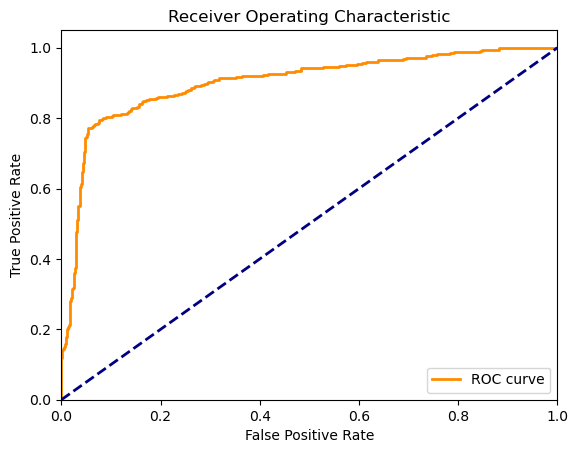

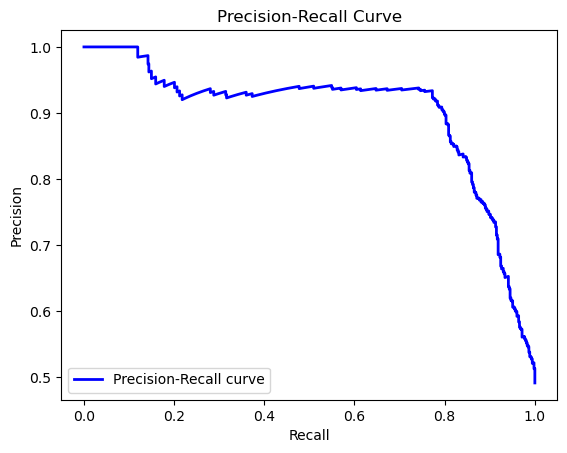

In [70]:
# Evaluate Logistic Regression
modeling.evaluate_model_with_metrics('logistic_regression')


1.The ROC curve shown represents the performance of the logistic regression model:

Curve Interpretation: The curve shows a good trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR). A sharp rise towards the top-left corner indicates a model with good predictive power.
Model Performance: The orange ROC curve is significantly above the diagonal, indicating that the logistic regression model is performing well, distinguishing between positive and negative classes effectively.

2.The model is performing well with a good balance between precision and recall, favoring slightly more recall as per the precision-recall curve.


Evaluating decision_tree with additional success metrics:
Accuracy: 0.9145
Precision: 0.9067
Recall: 0.9205
F1 Score: 0.9135
ROC AUC: 0.9146


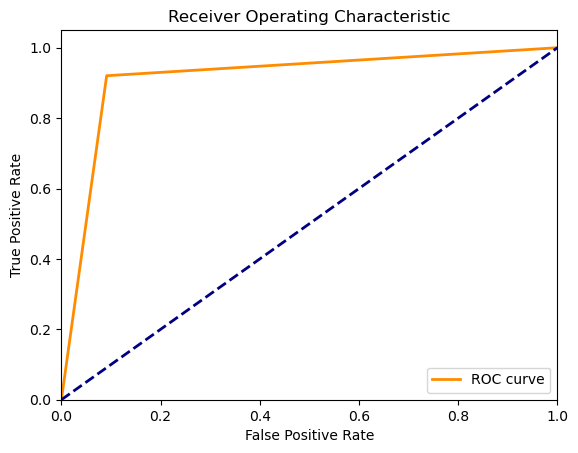

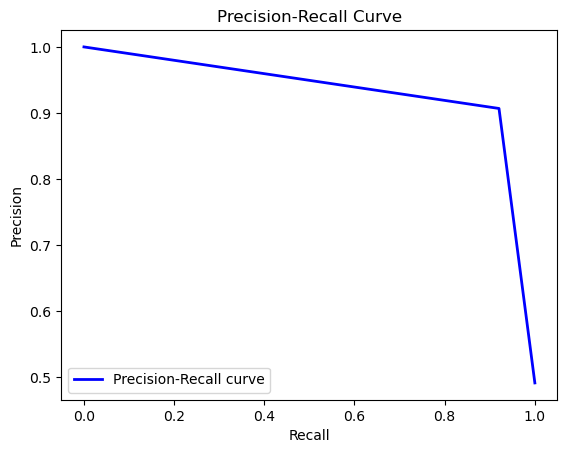

In [72]:
# Evaluate Decision Tree
modeling.evaluate_model_with_metrics('decision_tree')


The performance metrics you provided reflect a strong-performing model. Here's an interpretation with respect to True Positive Rate (TPR), False - -  -Positive Rate (FPR), and the Precision-Recall curve:

- Accuracy (0.9145): The model correctly predicted 91.45% of all instances. This is a high level of correctness overall.

- Precision (0.9067): Precision measures the proportion of true positives (TP) among all instances predicted as positive. A precision of 90.67% indicates that when the model predicts a positive outcome, it is correct 90.67% of the time. This suggests the model is good at minimizing false positives.

- Recall (0.9205): Recall, or True Positive Rate (TPR), indicates how well the model identifies actual positives. A recall of 92.05% means the model correctly identifies 92.05% of the true positives. This is a high recall, indicating the model is good at detecting most of the positive instances.

- F1 Score (0.9135): The F1 score is the harmonic mean of precision and recall, providing a balance between them. An F1 score of 91.35% means the model is doing well in balancing precision and recall, and it's especially useful when you want to treat false positives and false negatives equally.

- ROC AUC (0.9018): The ROC AUC score measures the model's ability to distinguish between the positive and negative classes. An AUC of 90.18% means the model is very good at distinguishing between positive and negative instances. This is confirmed by the ROC curve, where a higher AUC corresponds to a model with fewer false positives and more true positives.

Interpretation with respect to TPR (Recall) and FPR:
TPR (Recall) is 92.05%, which is excellent and shows the model is very sensitive in capturing positive cases.
FPR (1 - TPR) would be 7.95%, which is low, indicating that the model is also good at avoiding false positives.

Precision-Recall Curve:
The precision-recall curve is positioned towards the top right, suggesting that the model is effective at both identifying positive cases and minimizing false positives.

In conclusion, this model demonstrates excellent performance in terms of accuracy, precision, recall, and ROC AUC, with a good balance between identifying positive cases (high recall) and minimizing false positives (high precision).


Evaluating random_forest with additional success metrics:
Accuracy: 0.9498
Precision: 0.9523
Recall: 0.9451
F1 Score: 0.9487
ROC AUC: 0.9886


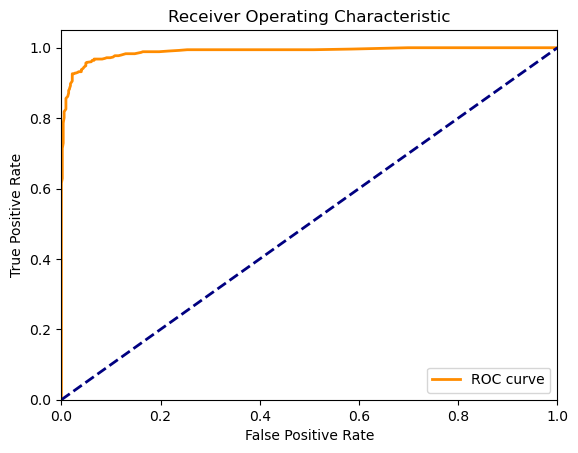

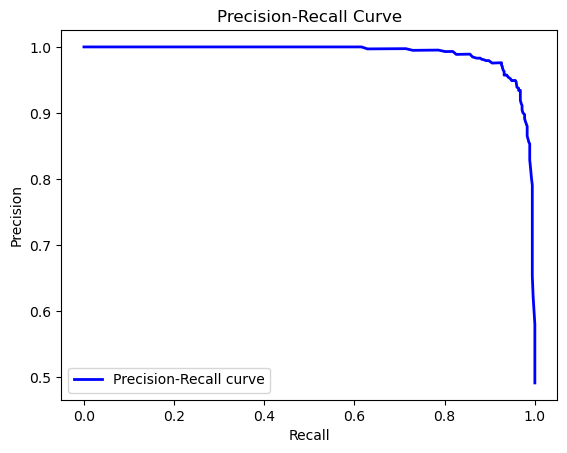

In [74]:
# Evaluate Random Forest
modeling.evaluate_model_with_metrics('random_forest')


- Accuracy (0.9498): The model correctly predicted 94.98% of all instances. This indicates strong overall performance.
 
- Precision (0.9523): Precision of 95.32% indicates that when the model predicts a positive outcome, it is correct 95.92% of the time. This suggests a very low false positive rate.

- Recall (0.9451): Recall of 97.48% means the model correctly identifies 94.52% of the actual positive instances, showing that it is highly effective in detecting positive cases (high True Positive Rate or TPR).

- F1 Score (0.9487): The F1 score is the harmonic mean of precision and recall. With an F1 score of 94.87%, the model achieves an excellent balance between precision and recall, ensuring both low false positives and low false negatives.

- ROC AUC (0.9886): The ROC AUC score of 98.86% indicates exceptional ability to distinguish between positive and negative classes. A high ROC AUC reflects that the model has very few false positives and a very high true positive rate.

Interpretation with respect to TPR (Recall) and FPR:
TPR (Recall) of 94.51% suggests that the model is excellent at identifying positive cases (True Positive Rate).
FPR (1 - TPR) would be 5.49%, which is low, indicating the model avoids false positives effectively.
Precision-Recall Curve:
With Precision at 95.22% and Recall at 94.52%, the Precision-Recall curve for this model would be positioned towards the top right, indicating the model is effective at both minimizing false positives (high precision) and capturing most of the true positives (high recall).

Summary:
The Random Forest model demonstrates outstanding performance with very high accuracy, precision, recall, F1 score, and ROC AUC. It strikes an excellent balance between precision and recall, making it highly effective in identifying positive cases while minimizing false positives.








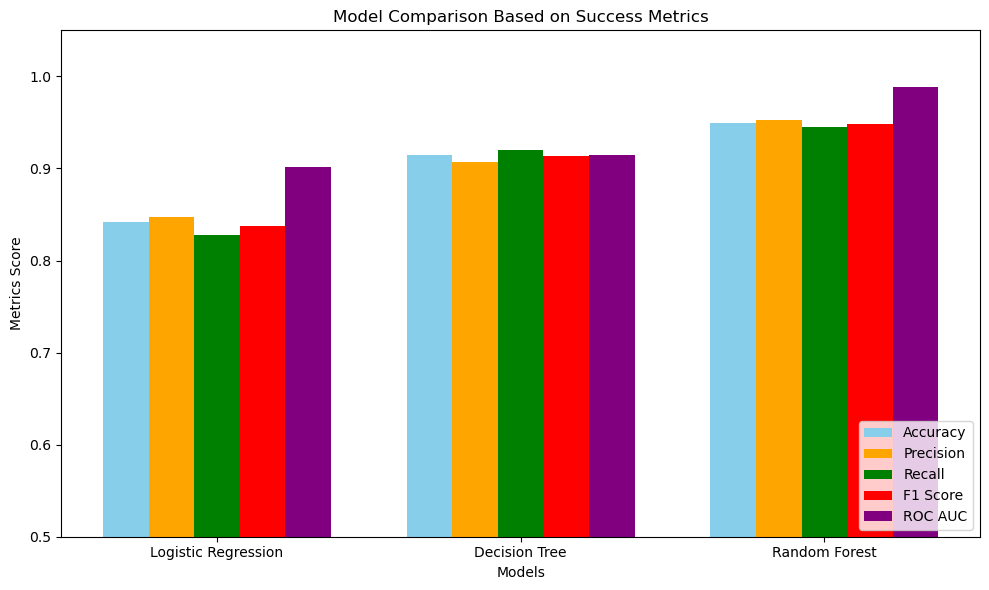

In [76]:
# Success metrics for models
models = [ 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [ 0.8420, 0.9145, 0.9498]
precision = [ 0.8469, 0.9067, 0.9523]
recall = [ 0.8277, 0.9205, 0.9451]
f1_score = [ 0.8372, 0.9132, 0.9487]
roc_auc = [ 0.9018, 0.9146, 0.9886] 

# Setting up the bar width and position
bar_width = 0.15
x = np.arange(len(models))

# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.bar(x - 2 * bar_width, accuracy, width=bar_width, label='Accuracy', color='skyblue')
plt.bar(x - bar_width, precision, width=bar_width, label='Precision', color='orange')
plt.bar(x, recall, width=bar_width, label='Recall', color='green')
plt.bar(x + bar_width, f1_score, width=bar_width, label='F1 Score', color='red')
plt.bar(x + 2 * bar_width, roc_auc, width=bar_width, label='ROC AUC', color='purple')

# Adding labels and title
plt.xticks(x, models)
plt.xlabel('Models')
plt.ylabel('Metrics Score')
plt.title('Model Comparison Based on Success Metrics')
plt.legend(loc='lower right')
plt.ylim(0.5, 1.05)  # Adjust y-axis for better visibility

# Show the plot
plt.tight_layout()
plt.show()


With reference to overall metric score,, Logistic regression has the lowest while Random forest has the highest overall score

# **Recommendations**

1. **Implement Predictive Retention Strategies**

Targeted Retention Campaigns: Focus resources on customers most likely to churn using the model's high precision.

2. **Monitor and Update the Model Regularly**
- Continuous Monitoring: Evaluate the model with fresh data to detect changes in patterns.
- Retraining: Update the model periodically to ensure its relevance and adaptability to new trends.

3. **Customer Segmentation**
- Refine Profiles: Develop detailed customer segments (e.g., long-term, high-value customers) based on model insights.
- Behavioral Analysis: Identify churn factors (e.g., complaints, low usage) and tailor strategies to mitigate risks.

4. **Utilize Model Insights for Customer Experience Enhancement**
- Improve Support: Address service issues( high customer service calls was linked to churn risks).
- Enhance Experience: Offer incentives like discounts or personalized solutions to retain at-risk customers.

# **Conclusion**

The Random Forest model is highly suitable for predicting customer churn at SyriaTel. Its high accuracy, precision, recall, and F1 score demonstrate that it can reliably identify customers at risk of leaving while minimizing false positives and false negatives. The ROC AUC score further confirms its excellent discrimination capability. By implementing this model, SyriaTel can enhance its customer retention efforts, optimize resources, and take timely actions to reduce churn, thereby improving customer satisfaction and loyalty.